# Part A : Data preprocessing

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset

In [2]:
dataset= pd.read_csv("Salary_Data.csv")

In [3]:
dataset

,Experience in years,Employee Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


# Create feature matrix X and output Vector Y

In [4]:
X= dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values

In [5]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

# Replacing missing data

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
imputer= SimpleImputer(missing_values=np.nan,strategy='mean')
X[:,:]= imputer.fit_transform(X[:,:])

# Encoding not reqd

# Feature Scaling not reqd

# Spliting dataset into training and testing

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,Y,test_size=0.2,random_state=1)

In [10]:
Xtrain

array([[ 9.5],
       [ 2. ],
       [ 8.7],
       [ 7.9],
       [ 8.2],
       [ 2.2],
       [ 1.5],
       [ 9. ],
       [ 3. ],
       [ 5.9],
       [ 4.1],
       [ 3.2],
       [ 9.6],
       [ 1.3],
       [ 5.1],
       [ 1.1],
       [ 4.9],
       [10.5],
       [10.3],
       [ 3.7],
       [ 3.2],
       [ 4. ],
       [ 4. ],
       [ 2.9]])

In [11]:
Xtest

array([[5.3],
       [7.1],
       [3.9],
       [6. ],
       [4.5],
       [6.8]])

In [12]:
Ytrain

array([116969,  43525, 109431, 101302, 113812,  39891,  37731, 105582,
        60150,  81363,  57081,  54445, 112635,  46205,  66029,  39343,
        67938, 121872, 122391,  57189,  64445,  56957,  55794,  56642],
      dtype=int64)

In [13]:
Ytest

array([83088, 98273, 63218, 93940, 61111, 91738], dtype=int64)

# Part B : Building a Machine Learning Model

# Training the linear model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr= LinearRegression()
lr.fit(Xtrain,Ytrain)

LinearRegression()

# Testing the model

In [16]:
Yestimated= lr.predict(Xtest)

In [17]:
Yestimated

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

In [18]:
Ytest

array([83088, 98273, 63218, 93940, 61111, 91738], dtype=int64)

# Visualization of data

# Training data

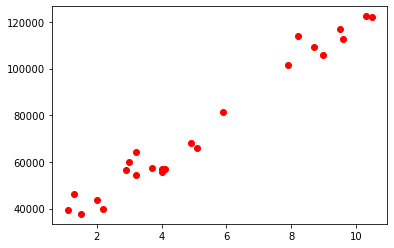

In [19]:
plt.scatter(Xtrain,Ytrain,color="red")

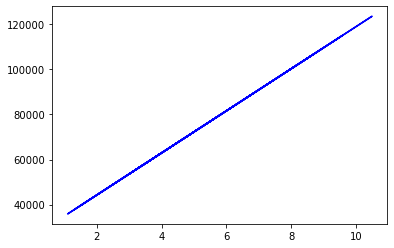

In [20]:
plt.plot(Xtrain,lr.predict(Xtrain),color="blue")

Text(0.5, 1.0, 'Plotting for training dataset')

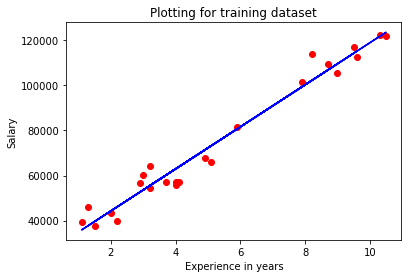

In [21]:
plt.scatter(Xtrain,Ytrain,color="red")
plt.plot(Xtrain,lr.predict(Xtrain),color="blue")
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.title("Plotting for training dataset")

# Testing data

Text(0.5, 1.0, 'Plotting for testing dataset')

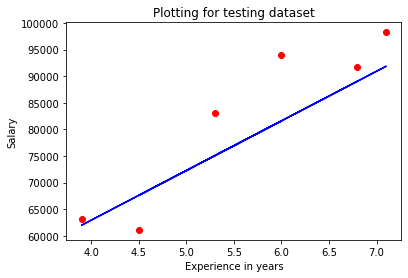

In [22]:
plt.scatter(Xtest,Ytest,color="red")
plt.plot(Xtest,lr.predict(Xtest),color="blue")
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.title("Plotting for testing dataset")

In [23]:
lr.coef_

array([9332.94473799])

In [24]:
lr.intercept_

25609.89799835482

# Find the salary of the employee if the given experience is 5 yrs

In [25]:
print(lr.predict([[5]]))

[72274.62168832]
